## Summary
| Method          | Lower outlier threshold | Upper outlier threshold | pct of outliers |
|-----------------|-------------------------|-------------------------|-----------------|
| Histogram       |                         |                         |                 |
| Box plot        |                         |                         |                 |
| Scatter plot    |                         |                         |                 |
| Residual plot   |                         |                         |                 |
| Cook's distance |                         |                         |                 |


# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

import plotly.express as px
#increase font size of all elements
sns.set(font_scale=1.5)


# Load the data

In [2]:
# read csv file
data = (pd.read_csv('data/donnee_Station_Meteo.csv', sep=';',
                       index_col=1,
                       parse_dates=[1])
            .dropna(how='all')
            .drop(columns=['id',' '])
            )
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3036 entries, 2018-06-22 12:00:52 to 2022-01-31 07:08:40
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp1          3036 non-null   float64
 1   hum1           3036 non-null   float64
 2   Pression       3036 non-null   float64
 3   Temp2          3036 non-null   float64
 4   hum2           3036 non-null   float64
 5   Conc_Stand_1   3036 non-null   int64  
 6   Conc_Stand_25  3036 non-null   int64  
 7   Conc_Stand_10  3036 non-null   int64  
 8   Conc_Env_1     3036 non-null   int64  
 9   Conc_Env_25    3036 non-null   int64  
 10  Conc_Env_10    3036 non-null   int64  
 11  Part_03        3036 non-null   int64  
 12  Part_05        3036 non-null   int64  
 13  Part_1         3036 non-null   int64  
 14  Part_25        3036 non-null   int64  
 15  Part_5         3036 non-null   int64  
 16  Part_50        3036 non-null   int64  
 17  Lum            3

None

,Temp1,hum1,Pression,Temp2,hum2,Conc_Stand_1,Conc_Stand_25,Conc_Stand_10,Conc_Env_1,Conc_Env_25,Conc_Env_10,Part_03,Part_05,Part_1,Part_25,Part_5,Part_50,Lum
time,,,,,,,,,,,,,,,,,,
2018-06-22 12:00:52,28.70,41.45,1011.88,29.07,50.52,6,10,22,6,10,22,0,0,0,0,0,0,51
2018-06-22 12:05:59,26.67,44.21,1011.90,26.63,53.92,6,9,9,6,9,9,1164,366,50,3,0,0,54
2018-06-22 12:11:05,25.63,46.44,1011.81,26.34,54.95,6,8,10,6,8,10,1164,340,37,5,2,0,22
2018-06-22 12:16:12,24.88,50.00,1011.77,26.07,57.26,7,8,9,7,8,9,1245,367,45,3,1,0,9
2018-06-22 12:21:19,24.95,49.12,1011.67,26.01,56.83,4,6,6,4,6,6,1182,332,28,2,0,0,11


In [3]:
px.scatter(data_frame=data, y=['Temp2'])

# Plot histograms


<AxesSubplot:xlabel='Temp2', ylabel='Count'>

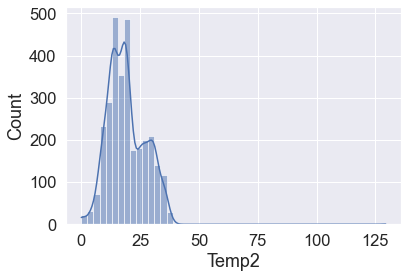

In [4]:
sns.histplot(data=data, x='Temp2', kde=True, bins=50)

<AxesSubplot:xlabel='Pression', ylabel='Count'>

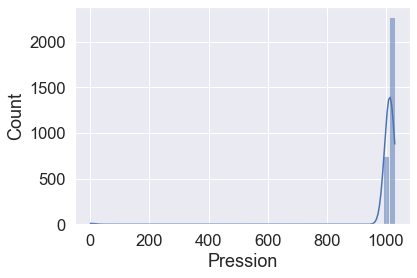

In [5]:
sns.histplot(data=data, x='Pression', kde=True, bins=50)

# Print basic statistics wtih `describe`


In [6]:
data.describe()

,Temp1,hum1,Pression,Temp2,hum2,Conc_Stand_1,Conc_Stand_25,Conc_Stand_10,Conc_Env_1,Conc_Env_25,Conc_Env_10,Part_03,Part_05,Part_1,Part_25,Part_5,Part_50,Lum
count,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,18.675270,45.055066,1006.951647,19.160418,84.246815,28.133729,34.619895,36.765810,20.198946,25.743083,27.869236,806.401186,254.202569,31.521080,2.669960,0.778656,0.125494,833.407444
std,7.972242,19.420880,83.064496,8.106661,26.049077,129.525030,138.690759,144.065735,86.034639,92.296720,96.149271,2329.614896,988.770151,100.451068,9.654924,2.469134,0.480659,5047.097318
min,-0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.890000,30.810000,1010.217500,13.360000,69.987500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.895000,41.950000,1013.135000,18.270000,100.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,24.665000,59.172500,1017.592500,25.022500,100.000000,9.000000,15.000000,16.250000,9.000000,15.000000,16.250000,928.500000,273.500000,24.000000,2.000000,0.000000,0.000000,247.750000
max,38.750000,95.480000,1030.880000,129.370000,100.000000,1796.000000,1872.000000,1930.000000,1196.000000,1246.000000,1286.000000,41811.000000,29020.000000,2283.000000,271.000000,53.000000,9.000000,262143.000000


# Plot box-plots


<AxesSubplot:xlabel='Temp2'>

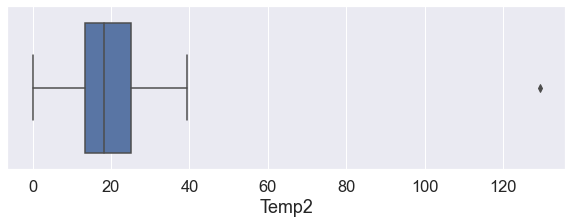

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
sns.boxplot(data=data, x='Temp2', whis=1.5, orient='horiz', ax=ax)

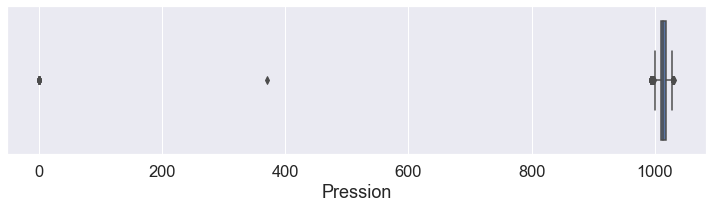

In [8]:
fig, ax= plt.subplots(1,1, figsize=(10,3))
sns.boxplot(data=data, x='Pression', whis=1.5, orient='horiz', ax=ax)
fig.tight_layout()

# Regresssion based methods

## Do a scatter plot


<AxesSubplot:xlabel='Temp2', ylabel='Pression'>

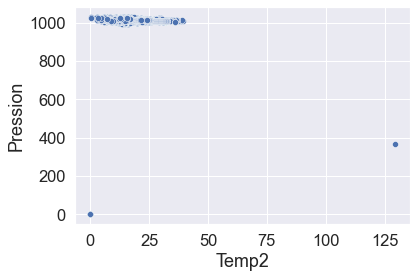

In [9]:
sns.scatterplot(data=data, x='Temp2', y='Pression')

## Do a residual plot


<AxesSubplot:xlabel='Temp2', ylabel='Pression'>

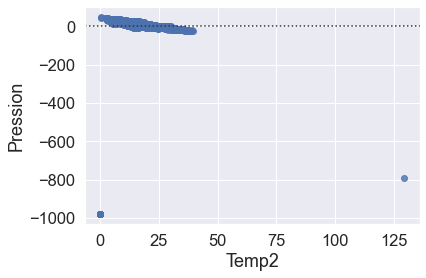

In [10]:
sns.residplot(data=data, x='Temp2', y='Pression')

## Use cook's distance


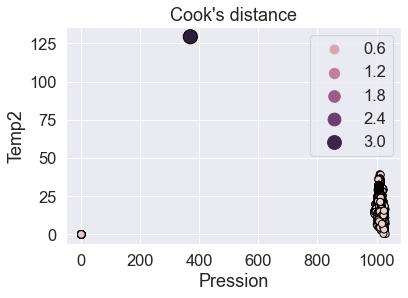

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library 
f = 'Pression ~ Temp2'
model = ols(formula=f, data=data).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(data=data, x="Pression", y="Temp2", hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
plt.title('Cook\'s distance');

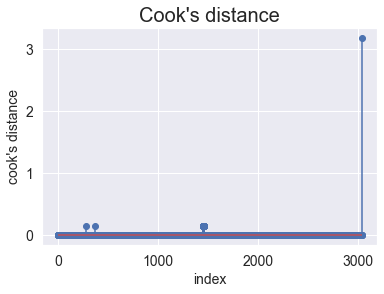

In [12]:
threshold = 4/data.shape[0]

# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance, basefmt=" ")

# horizontal line showing the threshold value
plt.hlines(threshold, -2, 1+data.shape[0], 'r')

# the observations with Cook's distances higher than the threshold value are labeled in the plot
influencial_data = distance[distance > threshold]

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('index', fontsize=14)
plt.ylabel('cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

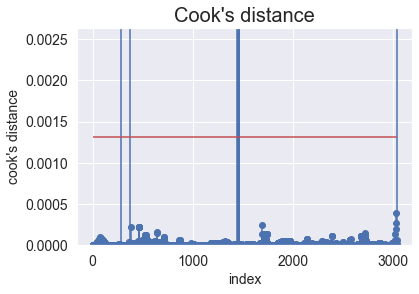

In [13]:
# Zooming around the threshold
plt.stem(distance, basefmt=" ")
plt.hlines(threshold, -2, 1+data.shape[0], 'r')
plt.ylim(0,2*threshold)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# labels and title
plt.xlabel('index', fontsize=14)
plt.ylabel('cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);